<a href="https://colab.research.google.com/github/Dev-Pandey-0302/BCSE331P-Exploratory-Data-Analysis/blob/main/21BDS0019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/github/Dev-Pandey-0302/BCSE331P-Exploratory-Data-Analysis/blob/main/21BDS0019.ipynb#scrollTo=afhKZo2mK9ZL


21BDS0019
DEV PANDEY

Exploratory Data Analysis Lab

Module 2: Data Transformation


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Airbnb Listings.csv",encoding="ISO-8859-1")

print(df.info())

<ipython-input-2-081e99b57ac9>:4: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Airbnb Listings.csv",encoding="ISO-8859-1")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [ ]:
df = df.drop_duplicates()
print(f"Number of rows after deduplication: {len(df)}")

Number of rows after deduplication: 279712


In [ ]:
df['price'] = df['price'].fillna(df['price'].mean())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

In [ ]:
df['price_category'] = pd.cut(df['price'], bins=[0, 50, 100, 200, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

In [ ]:
print(df.isnull().sum())
df = df.dropna(thresh=len(df.columns) * 0.5, axis=0)

listing_id                          0
name                              175
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                            0
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

Module 3: Correlation Analysis and Time Series Analysis

In [ ]:
print(df.describe())

         listing_id       host_id  host_response_rate  host_acceptance_rate  \
count  2.797110e+05  2.797110e+05       150930.000000         166625.000000   
mean   2.638204e+07  1.081661e+08            0.865939              0.827168   
std    1.442571e+07  1.108570e+08            0.283744              0.289202   
min    2.577000e+03  1.822000e+03            0.000000              0.000000   
25%    1.384473e+07  1.720656e+07            0.900000              0.780000   
50%    2.767110e+07  5.827156e+07            1.000000              0.980000   
75%    3.978488e+07  1.832854e+08            1.000000              1.000000   
max    4.834353e+07  3.901874e+08            1.000000              1.000000   

       host_total_listings_count       latitude      longitude   accommodates  \
count              279547.000000  279711.000000  279711.000000  279711.000000   
mean                   24.581612      18.762011      12.595275       3.288719   
std                   284.041143      32.5603

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

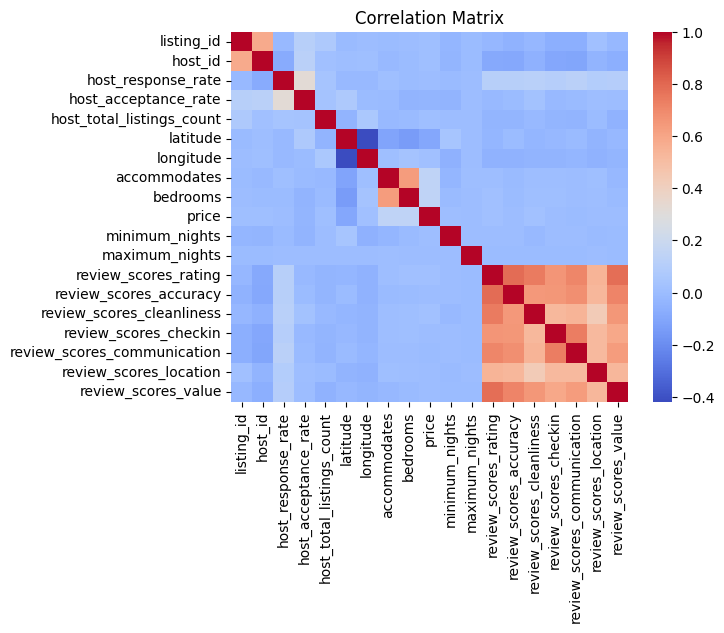

In [ ]:
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

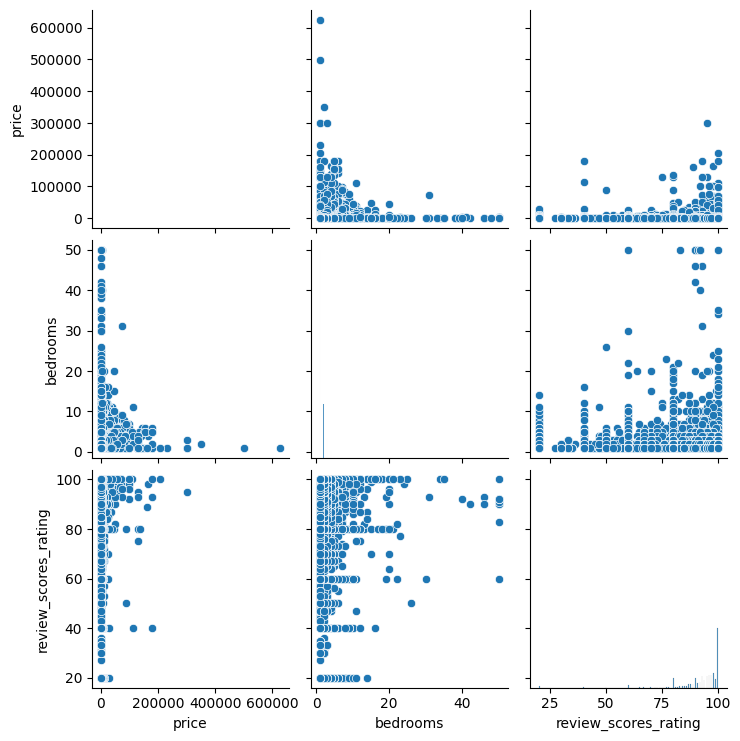

In [ ]:
sns.pairplot(df[['price', 'bedrooms', 'review_scores_rating']])
plt.show()

In [ ]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

<ipython-input-15-416bdba6ce99>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.set_index('host_since')['listing_id'].resample('Y').count().plot()


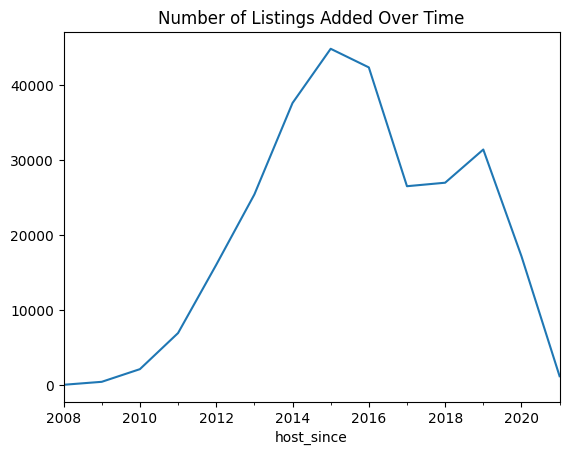

In [ ]:
df.set_index('host_since')['listing_id'].resample('Y').count().plot()
plt.title("Number of Listings Added Over Time")
plt.show()

Module 4: Data Summarization and Visualization

In [ ]:
print(df[['price', 'bedrooms', 'review_scores_rating']].describe())

               price       bedrooms  review_scores_rating
count  279711.000000  279711.000000         188307.000000
mean      608.780288       1.461255             93.405195
std      3441.826466       1.102131             10.070437
min         0.000000       1.000000             20.000000
25%        75.000000       1.000000             91.000000
50%       150.000000       1.000000             96.000000
75%       474.000000       2.000000            100.000000
max    625216.000000      50.000000            100.000000


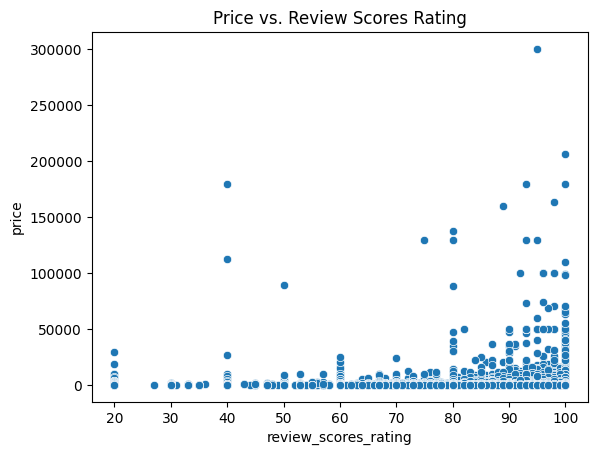

In [ ]:
sns.scatterplot(x='review_scores_rating', y='price', data=df)
plt.title("Price vs. Review Scores Rating")
plt.show()

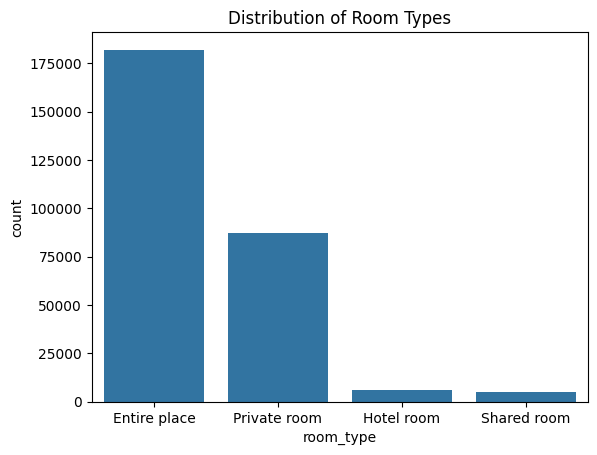

In [ ]:
sns.countplot(x='room_type', data=df)
plt.title("Distribution of Room Types")
plt.show()

Module 5: Clustering Algorithms

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
features = df[['price', 'bedrooms', 'review_scores_rating']].dropna()

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df['cluster'] = np.nan
df.loc[features.index, 'cluster'] = clusters

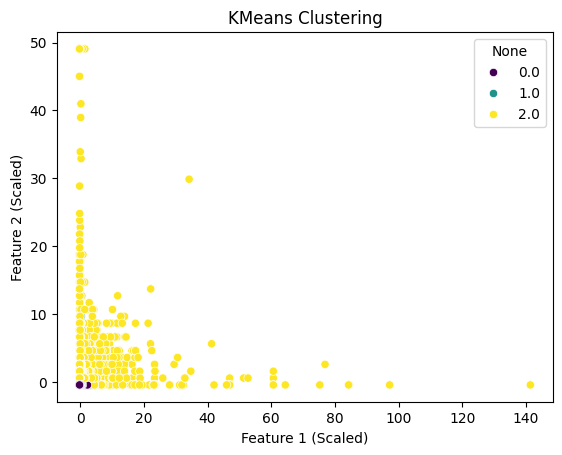

In [ ]:
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=features.index.map(lambda idx: df.loc[idx, 'cluster']),
    palette="viridis"
)
plt.title("KMeans Clustering")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()

Module 6: Dimensionality Reduction

In [ ]:
filtered_df = df.loc[features.index]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

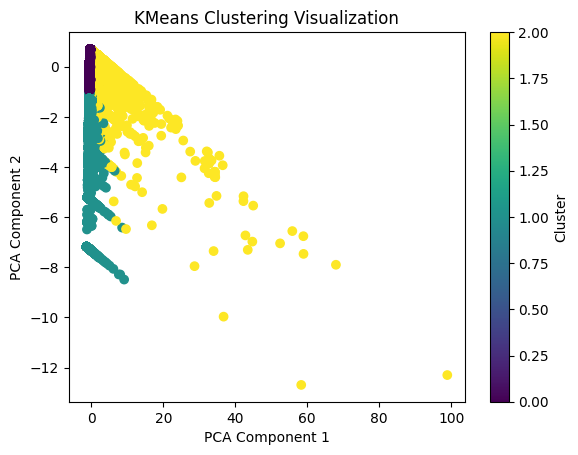

In [ ]:
plt.scatter(
    reduced_data[:, 0],
    reduced_data[:, 1],
    c=filtered_df['cluster'],
    cmap='viridis'
)
plt.title("KMeans Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

Module 7: Model Development and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df[['bedrooms', 'review_scores_rating']].fillna(0)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Mean Squared Error: 9628114.917537404
R-squared: 0.029114152587133457
